### (0 баллов) Считываем данные

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import cross_val_score

dataset = load_boston()
dataset.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

Каждая квартира имеет 13 признаков:

In [3]:
X = dataset['data']
X[:10]

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, 0.0000e+00, 5.3800e-01,
        6.5750e+00, 6.5200e+01, 4.0900e+00, 1.0000e+00, 2.9600e+02,
        1.5300e+01, 3.9690e+02, 4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        6.4210e+00, 7.8900e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9690e+02, 9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        7.1850e+00, 6.1100e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9283e+02, 4.0300e+00],
       [3.2370e-02, 0.0000e+00, 2.1800e+00, 0.0000e+00, 4.5800e-01,
        6.9980e+00, 4.5800e+01, 6.0622e+00, 3.0000e+00, 2.2200e+02,
        1.8700e+01, 3.9463e+02, 2.9400e+00],
       [6.9050e-02, 0.0000e+00, 2.1800e+00, 0.0000e+00, 4.5800e-01,
        7.1470e+00, 5.4200e+01, 6.0622e+00, 3.0000e+00, 2.2200e+02,
        1.8700e+01, 3.9690e+02, 5.3300e+00],
       [2.9850e-02, 0.0000e+00, 2.1800e+00, 0.0000e+00, 4.5800e-01,
        6.4300e+00, 5.8700e

In [4]:
dataset['feature_names']

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [5]:
print(dataset['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

Хочется научиться предсказывать функцию цены квартиры. Предположительно, она зависит как-то от этих признаков.

In [6]:
y = dataset['target']
y[:10]

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9])

### (1 балл) Разделите данные на тренировочную и тестовую части.

Тестовая часть должна составлять 10% выборки.


In [7]:
train_df, test_df = train_test_split(np.concatenate((dataset['data'], dataset['target'].reshape(-1, 1)), axis=1), 
                                     test_size=0.1)
X_train, y_train = train_df[:, :-1], train_df[:, -1]
X_test, y_test = test_df[:, :-1], test_df[:, -1]

### (1 балл) Обучение и применение модели
Обучите модель линейной регрессии на тренировочной части и предскажите результаты на тестовой части.



In [8]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

### (2 балл) Валидация результата

Напишите свою функцию MSE, убедитесь, что она совпадает с реализацией из sklearn и посчитайте своей результат на тестовой части.

In [9]:
from sklearn.metrics import mean_squared_error
def MSE(y_real, y_pred):
    return float(((y_real - y_pred) ** 2).sum() / y_real.shape)

In [10]:
a = np.array([1, 2])
b = np.array([2, 5])
print(MSE(a, b) == mean_squared_error(a, b))

True


In [11]:
print('MSE regression score:', MSE(y_pred, y_test))

MSE regression score: 30.14111809024838


Насколько хорошо вы предсказали цену? Сравните с наивным алгоритмом (предсказать среднюю цену на тренировочной части вне зависимости от признаков).

In [12]:
mean_y = np.ones(len(y_test)) * np.mean(y_train)
print('MSE stupid score:', MSE(mean_y, y_test))

MSE stupid score: 86.67323986541362


Ну, результат регрессии явно получше

### (2 балла) Улучшите результат.

Возможно, происходит переобучение, попробуйте применить регуляризацию, чтобы улучшить результат (то есть используйте Ridge вместо LinearRegression).

Нарисуйте график зависимости MSE от коэффициента регуляризации.

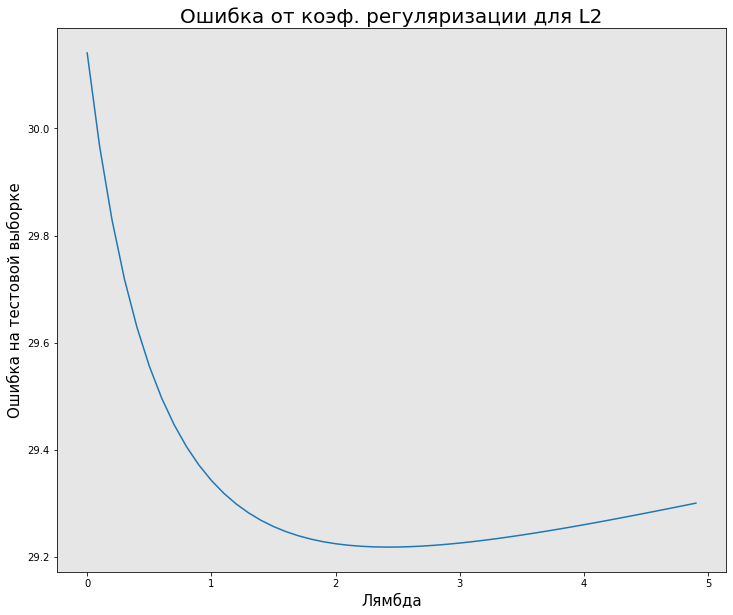

In [13]:
lambdas = np.arange(0, 5, 0.1)

# Лямбды и их ошибки на тестовой выборке
lambda_errors = []

# Проходим по всем лямбдам и записываем ошибки на тестовой выборке
for val in lambdas:
    reg = Ridge(alpha=val)
    reg.fit(X_train, y_train)
    lambda_errors.append(MSE(y_test, reg.predict(X_test)))
    
best_lambda = lambdas[np.argmin(lambda_errors)]

plt.rcParams.update({'axes.facecolor':'#E6E6E6'})
plt.figure(figsize=(12, 10))
plt.plot(lambdas, lambda_errors)
plt.title('Ошибка от коэф. регуляризации для L2', fontsize=20)
plt.xlabel('Лямбда', fontsize=15)
plt.ylabel('Ошибка на тестовой выборке', fontsize=15)
plt.show()

Помогает ли регуляризация? Какой коэффициент регуляризации надо выбрать, чтобы ошибка была минимальной? Чему при этом равна ошибка? Напишите выводы о проведенных экспериментах

In [14]:
print('Лучший коэф. регуляризации:', best_lambda)
best_model = Ridge(alpha=best_lambda)
best_model.fit(X_train, y_train)
print('MSE score:', MSE(y_test, best_model.predict(X_test)))

Лучший коэф. регуляризации: 2.4000000000000004
MSE score: 29.217911890419046


Регуляризация действительно помогла. Выдача предсказаний моделью линейной регрессии оказалась лучше выдачи предсказаний как среднего по тренировочной выборке. Грамотный подбор коэф. регуляризации помог еще больше улучшить score.